# Linear Regression

The images that are not referenced are taken from this link. [Link to tutorial](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)

![image.png](./formula-images/LinearRegressionLine.png)


## Table of Contents
    1. What is Linear Regression
    2. Hypothesis of Linear Regression
    3. Training a Linear Regression Model
    4. Evaluating the Model
    5. scikit-learn implementation
    
    
### 1.  What is Linear Regression
The objective of a linear regression model is to find a relationship between one or more features (independent variables) and a continuous target variable (dependent variable). Whe there is only one feature it is called *univariate* Lienar Regression and if there are multiple features, it is called *Multivariate* Linear Regression.

### 2. Hypothesis of Linear Regression
The linear regression model can be represented by the following equation

![image.png](./formula-images/hypothesis1.png)

* Y is the predicted value
* θ₀ is the bias term.
* θ₁,…,θₙ are the model parameters
* x₁, x₂,…,xₙ are the feature values.

The above hypothesis can also be represented by

![image.png](./formula-images/hypothesis2.png)


where

* θ is the model’s parameter vector including the bias term θ₀
* x is the feature vector with x₀ =1

### Data-set
Let's create some random data-set to train the model

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# generate random dataset
# This would keep the random data generated consistant otherwise running
# the script each time will change the output (random data)
def generate_dataset():
    """ Generates Random Data
    Returns
    -------
    x : array-like, shape = [n_samples, n_features]
            Training samples
    y : array-like, shape = [n_samples, n_target_values]
            Target values
    """
    np.random.seed(0)
    x = np.random.rand(100, 1)
    y = 2 + 3 * x + np.random.rand(100, 1)
    return x, y

# plot
def scatter_plot(train_sams, target_vals, size=10, x_label='x', y_label='y', color='b'):
    """
    Generates the scatter plot for training samples and target values
    train_sams (x): training samples
    target_vals (y): target samples/values
    """
    plt.scatter(train_sams, target_vals, s=size, color=color)
    set_labels(x_label, y_label)
    
def set_labels(x_label, y_label):
    """
    Setting the x and y labels of the plot
    """
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def plot(train_sams, target_vals, x_label='x', y_label='y', color='r'):
    plt.plot(train_sams, target_vals, color=color)
    set_labels(x_label, y_label)
    
def ploty(target_vals, x_label='x', y_label='y'):
    plt.plot(target_vals)
    set_labels(x_label, y_label)
    
    

### 3. Training the Linear Regression Model
Training of the model here means to find the parameters so that the model best fits the data.

#### *How do we determine the best fit line*
The line for which the *error* between the predicted values and the observed values is minimun is called the best fit line or regression line. These errors are called **_residuals_**. The residuals can be visualized by the vertical lines from the observed data value to the regression line.

![image.png](./formula-images/residuals.png)
    Image Credits: http://wiki.engageeducation.org.au/further-maths/data-analysis/residuals/


To define and measure the error of our model we define the cost function as the of the squares of the residuals. The cost function is denoted by

![image.png](./formula-images/cost-function-least-squares.png)

where the hypothesis function h(x) is denoted by

![image.png](./formula-images/hypothesis-function.png)

and *m* is the total number of training examples in our dataset

Why do we take the square of the residuals and not the absolute value of the residuals ? We want to penalize the points which are farther from the regression line much more than the points which lie close to the line.
Our objective is to find the model parameters so that the cost function is minimum. We will use Gradient Descent to find this.

#### Gradient descent

Gradient descent is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function. The steps of gradient descent is outlined below.

1. We first initialize the model parameters with some random values. This is also called as random initialization.

2. Now we need to measure how the cost function changes with change in it’s parameters. Therefore we compute the partial derivatives of the cost function w.r.t to the parameters θ₀, θ₁, … , θₙ

![image.png](./formula-images/partial-derivative1.png)
![image.png](./formula-images/partial-derivative2.png)


similarly, the partial derivative of the cost function w.r.t to any parameter can be denoted by

![image.png](./formula-images/partial-derivative3.png)


We can compute the partial derivatives for all parameters at once using

![image.png](./formula-images/partial-derivative-matrix.png)

where h(x) is

![image.png](./formula-images/hypothesis-function.png)


3. After computing the derivative we update the parameters as given below

![image.png](./formula-images/parameter0.png)
![image.png](./formula-images/parameter1.png)


where **_α_** is the **_learning parameter._**

We can update all the parameters at once using,

![image.png](./formula-images/all-param-updated.png)


We repeat the steps 2,3 until the cost function converges to the minimum value. If the value of α is too small, the cost function takes larger time to converge. If α is too large, gradient descent may overshoot the minimum and may finally fail to converge.

![image.png](./formula-images/convergence-divergence.png)


Source: Andrew Ng’s course on Coursera
To demonstrate the gradient descent algorithm, we initialize the model parameters with 0. The equation becomes Y = 0. Gradient descent algorithm now tries to update the value of the parameters so that we arrive at the best fit line.

When the learning rate is very slow, the gradient descent takes larger time to find the best fit line.

![image.png](./formula-images/learning-rate-slow.gif)


When the learning rate is normal

![image.png](./formula-images/learning-rate-normal.gif)

**_When the learning rate is arbitrarily high, gradient descent algorithm keeps overshooting the best fit line and may even fail to find the best line._**


![image.png](./formula-images/learning-rate-high-failed.gif)


## 3. Implementating Linear Regression from scratch

The complete implementation of linear regression with gradient descent is given below.

In [2]:
class LinearRegressionUsingGD:
    """ Linear Regression Using Gradient Descent.
    
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        Number of passes over the training set
        
    Attributes
    ----------
    w_ : weights after fitting the model (θ - theta)
    cost_ : total error of the model after each iteration
    
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations
        
    def fit(self, x, y):
        """Fit the training data
        
        Parameters
        ----------
        x : arrau_like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
            
        Returns
        -------
        self : object
        
        """
        
        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))  # x.shape[1] = columns
        m = x.shape[0]                       # x.shape[0] = rows (total number of data values)
        
        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)  # Hypothesis
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        
    def predict(self, x):
        """Predicts the value after the model has been trained.
        
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
            
        Returns
        -------
        Predicted value
        
        """
        
        return np.dot(x, self.w_)
    

[[2.58109277]
 [2.89114079]]


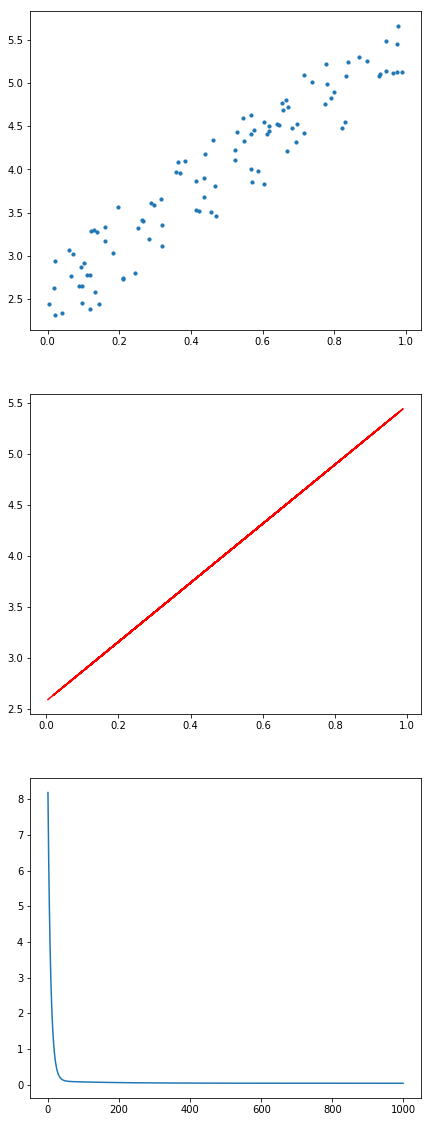

In [69]:
if __name__ == "__main__":
    
    # instantiate the model
    lin_reg_model = LinearRegressionUsingGD()
    
    # extracting training and target data
    x, y = generate_dataset()
    
    # tranform the feature vectors tp include the bias term
    # adding 1 to all the instances of the training set.
    m = x.shape[0]
    x_train = np.c_[np.ones((m, 1)), x] # c_ : https://stackoverflow.com/questions/10894323/what-does-the-c-underscore-expression-c-do-exactly
    
    # fit / train the model
    lin_reg_model.fit(x_train, y)
    
    # predict target values
    predicted_values = lin_reg_model.predict(x_train)
    
    # model parameters
    print(lin_reg_model.w_)
    intercept, coeffs = lin_reg_model.w_
    
    # cost function
    cost_function = lin_reg_model.cost_
    
    # plotting
    fig, axes = plt.subplots(3, 1, figsize=(7, 20))
    axes[0].scatter(x, y, s=10)
    axes[1].plot(x, predicted_values, color='r')
    axes[2].plot(cost_function)



####  The models parameters are given below

The coefficient is [2.58109277]

The intercept is [2.89114079]

